### **Bivariate Analysis Time Series Analysis (Order Date Analysis)**:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ast

In [17]:
orders = pd.read_csv("D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\International Sales Company Project\\International_Sales_Database\\Python_Analysis\\2_Data_Exploration_Univariate_Analysis\\Orders_Dataframe.csv")

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customerid   827 non-null    int64  
 1   firstname    827 non-null    object 
 2   lastname     827 non-null    object 
 3   city         827 non-null    object 
 4   country      827 non-null    object 
 5   orderid      827 non-null    int64  
 6   ordernumber  827 non-null    int64  
 7   orderdate    827 non-null    object 
 8   totalamount  827 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 58.3+ KB


**Convert Order Date Column To Datetime Data Type:**

In [19]:
orders["orderdate"] = pd.to_datetime(orders["orderdate"])

In [20]:
orders.head()

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
0,1,Maria,Anders,Berlin,Germany,396,542773,2013-08-25,1086.0
1,1,Maria,Anders,Berlin,Germany,445,542822,2013-10-03,878.0
2,1,Maria,Anders,Berlin,Germany,455,542832,2013-10-13,330.0
3,1,Maria,Anders,Berlin,Germany,764,543141,2014-04-09,960.0
4,1,Maria,Anders,Berlin,Germany,588,542965,2014-01-15,851.0


**Relationship Between Order Date & Total Amount:**

In [21]:
orders = orders.sort_values(by="orderdate", ascending=True)

In [22]:
orders.head()

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
760,85,Paul,Henriot,Reims,France,1,542378,2012-07-04,440.0
714,79,Karin,Josephs,Münster,Germany,2,542379,2012-07-05,1863.4
281,34,Mario,Pontes,Rio de Janeiro,Brazil,3,542380,2012-07-08,1813.0
750,84,Mary,Saveley,Lyon,France,4,542381,2012-07-08,670.8
695,76,Pascale,Cartrain,Charleroi,Belgium,5,542382,2012-07-09,3730.0


**1- Using Matplotlib Library:**

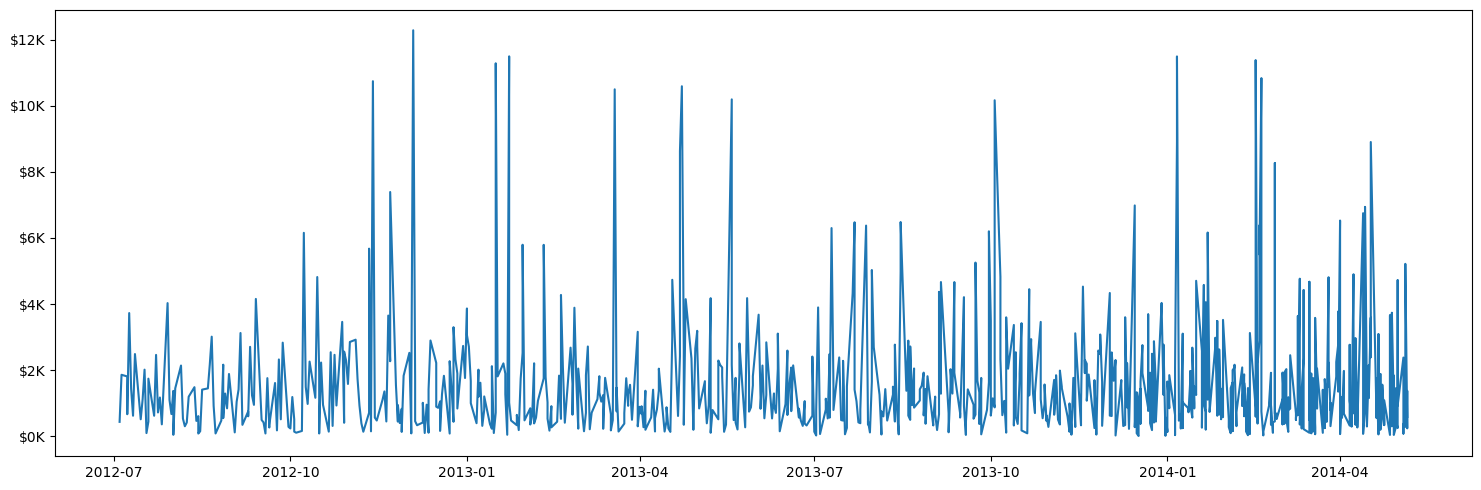

In [23]:
plt.figure(figsize=(15,5))
plt.plot(orders["orderdate"], orders["totalamount"])
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: (f"${int(y / 1000)}K")))

**2- Using Plotly Library:**

In [24]:
px.line(data_frame=orders, x=orders["orderdate"], y=orders["totalamount"])

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 760 to 617
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   827 non-null    int64         
 1   firstname    827 non-null    object        
 2   lastname     827 non-null    object        
 3   city         827 non-null    object        
 4   country      827 non-null    object        
 5   orderid      827 non-null    int64         
 6   ordernumber  827 non-null    int64         
 7   orderdate    827 non-null    datetime64[ns]
 8   totalamount  827 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.6+ KB


**Unique Country Count Per Month Analysis:**

- Pandas dataframe.resample() function is primarily used for time series data.

- A time series is a series of data points indexed (or listed or graphed) in time order. 

- Most commonly, a time series is a sequence taken at successive equally spaced points in time, it is a Convenience method for frequency conversion and resampling of time series. 

- The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

In [26]:
date_country_df = orders[["orderdate", "country"]].set_index("orderdate")

In [27]:
dateCountry1M = (date_country_df.resample(rule="1ME").nunique()).reset_index()

In [28]:
dateCountry1M

,orderdate,country
0,2012-07-31,11
1,2012-08-31,11
2,2012-09-30,11
3,2012-10-31,13
4,2012-11-30,11
5,2012-12-31,15
6,2013-01-31,15
7,2013-02-28,14
8,2013-03-31,12
9,2013-04-30,13


- To fix the deprecation warning regarding the use of 'M' in resample for monthly frequency, you can replace it with 'ME' which stands for 'Month End'. 

- By using '1ME', you are specifying a monthly frequency with the month ending at the end of the month, which is the equivalent of the deprecated 'M' frequency. 

In [29]:
dateCountry1M["ordermonth"] = dateCountry1M["orderdate"].dt.strftime("%b %Y")

In [30]:
dateCountry1M

,orderdate,country,ordermonth
0,2012-07-31,11,Jul 2012
1,2012-08-31,11,Aug 2012
2,2012-09-30,11,Sep 2012
3,2012-10-31,13,Oct 2012
4,2012-11-30,11,Nov 2012
5,2012-12-31,15,Dec 2012
6,2013-01-31,15,Jan 2013
7,2013-02-28,14,Feb 2013
8,2013-03-31,12,Mar 2013
9,2013-04-30,13,Apr 2013


**1- Using Matplotlib Library:**

Text(103.84722222222221, 0.5, 'Month-Year')

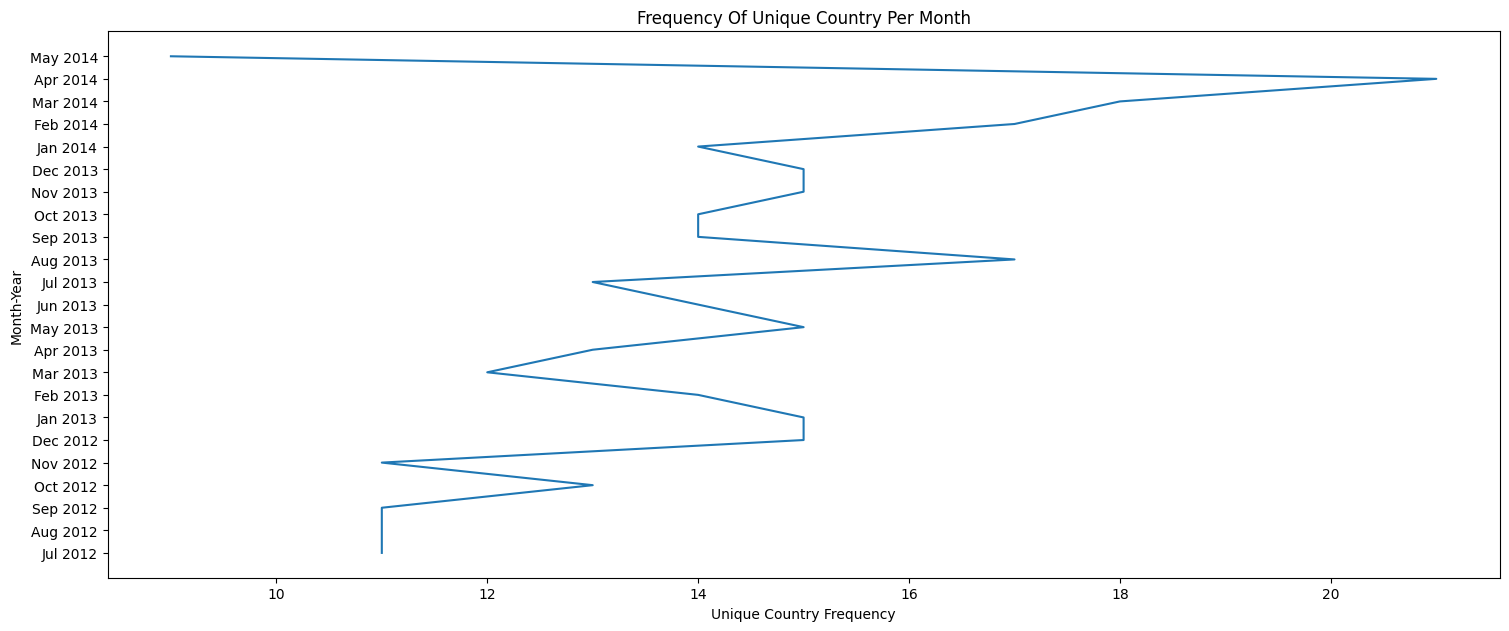

In [31]:
plt.figure(figsize=(15,6))
plt.plot(dateCountry1M["country"], dateCountry1M["ordermonth"])
plt.tight_layout()
plt.title("Frequency Of Unique Country Per Month")
plt.xlabel("Unique Country Frequency")
plt.ylabel("Month-Year")

**OR**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Jul 2012'),
  Text(1, 0, 'Aug 2012'),
  Text(2, 0, 'Sep 2012'),
  Text(3, 0, 'Oct 2012'),
  Text(4, 0, 'Nov 2012'),
  Text(5, 0, 'Dec 2012'),
  Text(6, 0, 'Jan 2013'),
  Text(7, 0, 'Feb 2013'),
  Text(8, 0, 'Mar 2013'),
  Text(9, 0, 'Apr 2013'),
  Text(10, 0, 'May 2013'),
  Text(11, 0, 'Jun 2013'),
  Text(12, 0, 'Jul 2013'),
  Text(13, 0, 'Aug 2013'),
  Text(14, 0, 'Sep 2013'),
  Text(15, 0, 'Oct 2013'),
  Text(16, 0, 'Nov 2013'),
  Text(17, 0, 'Dec 2013'),
  Text(18, 0, 'Jan 2014'),
  Text(19, 0, 'Feb 2014'),
  Text(20, 0, 'Mar 2014'),
  Text(21, 0, 'Apr 2014'),
  Text(22, 0, 'May 2014')])

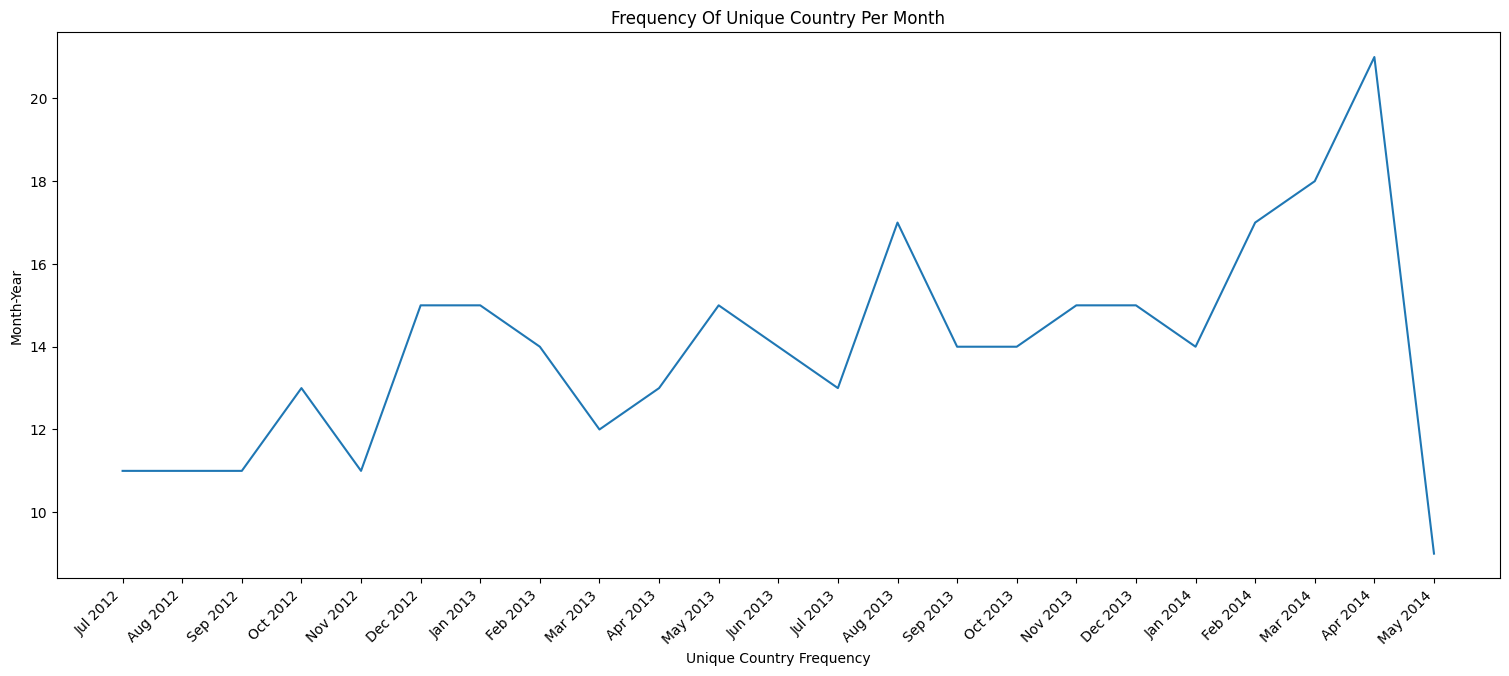

In [32]:
plt.figure(figsize=(15,6))
plt.plot(dateCountry1M["ordermonth"], dateCountry1M["country"])
plt.tight_layout()
plt.title("Frequency Of Unique Country Per Month")
plt.xlabel("Unique Country Frequency")
plt.ylabel("Month-Year")
plt.xticks(rotation=45, ha="right")

**2- Using Plotly Library:**

In [33]:
px.line(data_frame=dateCountry1M, x="country", y="ordermonth")

**OR**


In [34]:
px.line(data_frame=dateCountry1M, x="ordermonth", y="country")